In [1]:
import cv2
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg


In [3]:
import random
import os
import gc

In [4]:
train_dir = '/home/ashwani/fed/Data/Train'
test_dir = '/home/ashwani/fed/Data/Validate'

In [5]:
def load_images_from_folder(folder):
    images = []
    imgs_name=[]
    for filename in os.listdir(folder):
        imgs_name.append(os.path.join(folder,filename))
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return (images,imgs_name)

In [10]:
train_iron_man,iron_man_names = load_images_from_folder(train_dir+'/iron_man')


In [11]:
train_thanos, thanos_names= load_images_from_folder(train_dir+'/thanos')

In [12]:
test_iron_man,iron_man_names1 = load_images_from_folder(train_dir+'/iron_man')



In [13]:
test_thanos, thanos_names1= load_images_from_folder(train_dir+'/thanos')

In [14]:
del train_iron_man
del train_thanos
gc.collect()

11

In [15]:
test_data = iron_man_names1[:]+thanos_names1[:]

In [16]:
train_data = iron_man_names[:]+thanos_names[:]

del test_iron_man
del test_thanos
gc.collect()

0

In [21]:
random.shuffle(train_data)
random.shuffle(test_data)

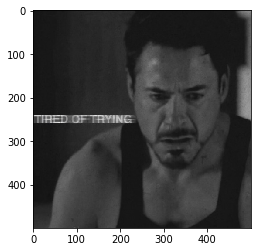

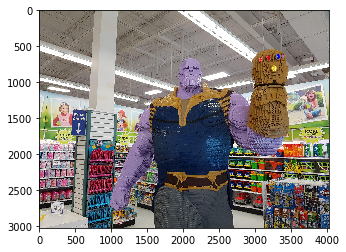

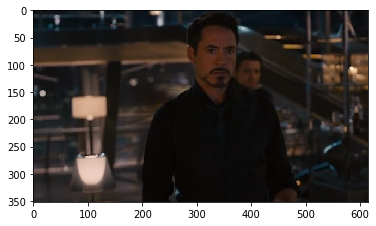

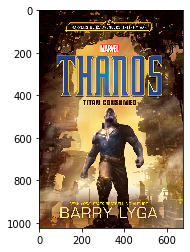

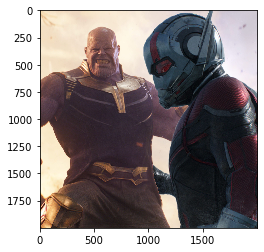

In [22]:
for img in train_data[:5]:
    rimg = mpimg.imread(img)
    imgplot=plt.imshow(rimg)
    plt.show()

In [23]:
nrows =150
ncolumns = 150
channels = 3

In [24]:
def read_process_images(imgs):
    X = []
    Y = []
    for img in imgs:
        X.append(cv2.resize(cv2.imread(img,cv2.IMREAD_COLOR),(nrows,ncolumns), interpolation = cv2.INTER_CUBIC))
        if 'iron' in img:
            Y.append(1)
        elif 'thanos' in img:
            Y.append(0)
            
    return X,Y

In [25]:
X,y = read_process_images(train_data)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.20,random_state =2)

In [28]:
del X
del y
gc.collect()

9701

In [29]:
batch_size = 32
X_train = np.asarray(X_train, dtype=np.float32)
X_val = np.asarray(X_val, dtype=np.float32)
y_train = np.asarray(y_train, dtype=np.float32)
y_val = np.asarray(y_val, dtype=np.float32)
y_train.shape


(896,)

In [30]:
y_val.shape

(224,)

In [31]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array,load_img


Using TensorFlow backend.


In [32]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0         
__________

In [34]:
model.compile(loss='binary_crossentropy',optimizer = optimizers.RMSprop(lr = 1e-4),metrics=['acc'])

In [35]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=45,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
train_generator = train_datagen.flow(X_train,y_train,batch_size=batch_size)

In [37]:
val_generator = val_datagen.flow(X_val,y_val,batch_size=batch_size)

In [38]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=280//batch_size,
                             epochs=46,
                             validation_data=val_generator,
                             validation_steps=80//batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/46
8/8 [==============================] - 20s 3s/step - loss: 0.7008 - acc: 0.5898 - val_loss: 0.6485 - val_acc: 0.6562
Epoch 2/46
8/8 [==============================] - 16s 2s/step - loss: 0.6289 - acc: 0.6953 - val_loss: 0.6922 - val_acc: 0.6875
Epoch 3/46
8/8 [==============================] - 17s 2s/step - loss: 0.6326 - acc: 0.6875 - val_loss: 0.7318 - val_acc: 0.5781
Epoch 4/46
8/8 [==============================] - 16s 2s/step - loss: 0.6122 - acc: 0.6953 - val_loss: 0.5748 - val_acc: 0.7500
Epoch 5/46
8/8 [==============================] - 16s 2s/step - loss: 0.6234 - acc: 0.6875 - val_loss: 0.5821 - val_acc: 0.7031
Epoch 6/46
8/8 [==============================] - 15s 2s/step - loss: 0.6220 - acc: 0.6758 - val_loss: 0.6228 - val_acc: 0.7031
Epoch 7/46
8/8 [==============================] - 15s 2s/step - loss: 0.5878 - acc: 0.6953 - val_loss: 0.7416 - val_acc: 0.6406
Epoch 8/46
8/8 [==============================] - 16s 2s

In [42]:
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')

<Figure size 432x288 with 0 Axes>

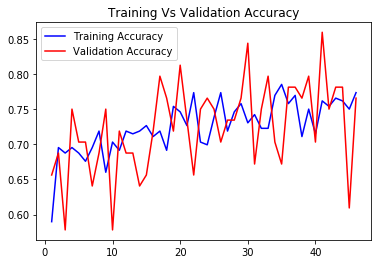

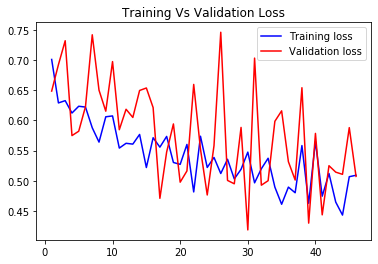

<Figure size 432x288 with 0 Axes>

In [44]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title("Training Vs Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training Vs Validation Loss')
plt.legend()
plt.figure()

In [68]:
X_test , y_test = read_process_images(test_data[:10])
columns=5

In [69]:
x = np.array(X_test)
test_datagen=ImageDataGenerator(rescale=1./255)

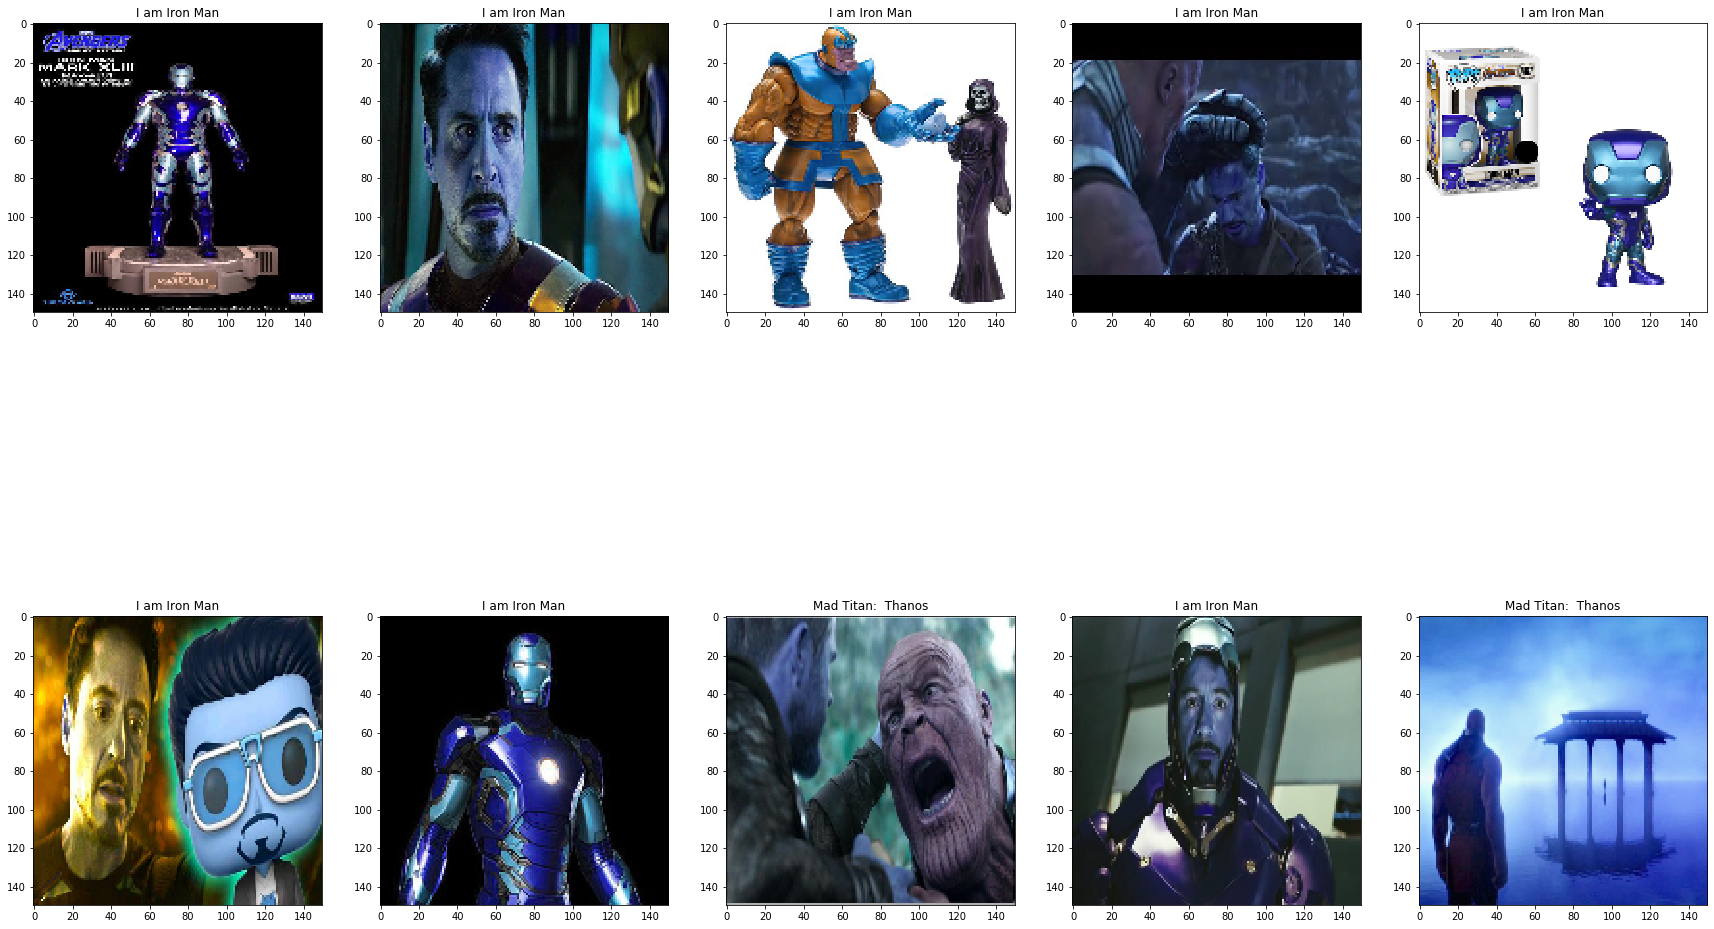

In [73]:
i =0
text_labels=[]
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(x,batch_size=1):
    pred = model.predict(batch)
    if pred>0.5:
        text_labels.append('Iron Man')
    else:
        text_labels.append('Thanos')
    plt.subplot(5/columns+1,columns,i+1)
    if text_labels[i]=='Iron Man':
        
        plt.title('I am '+text_labels[i])
    else:
         plt.title('Mad Titan:  '+text_labels[i])
        
    imgplot = plt.imshow(batch[0])
    i=i+1
    if (i%10) == 0:
        break
    
    
plt.show()